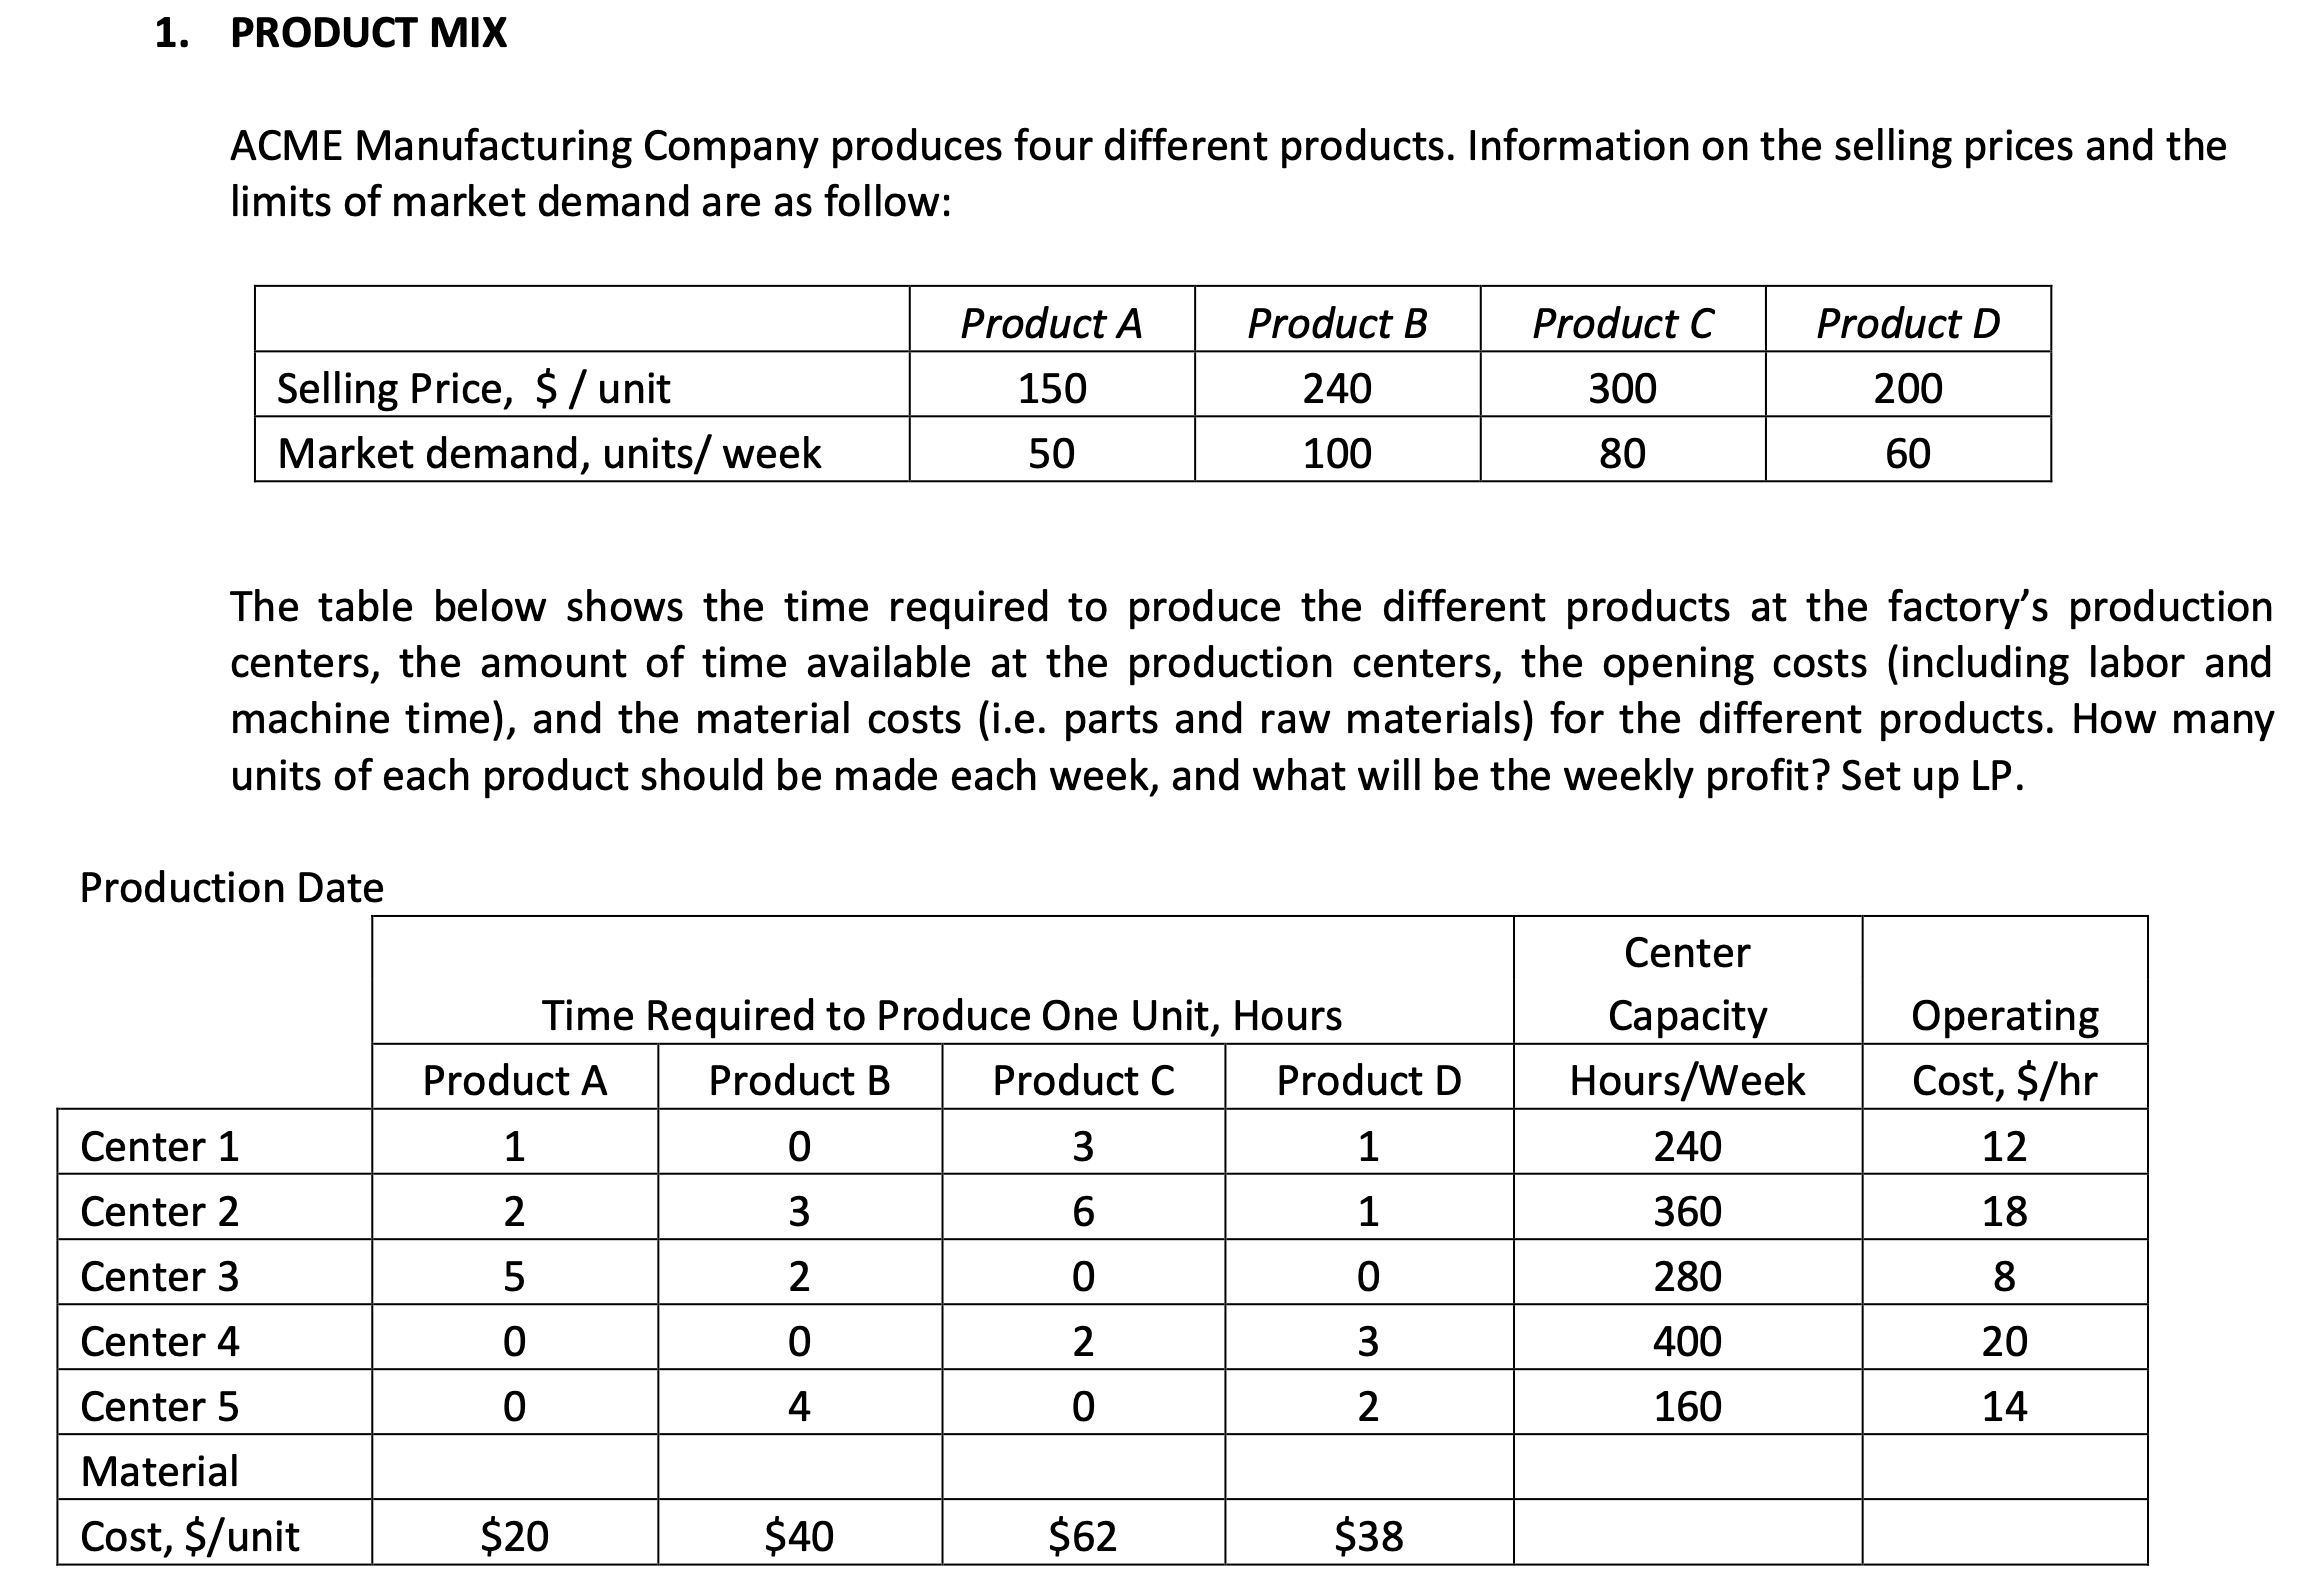

In [22]:
from pulp import *
import pandas as pd

In [21]:
infodf = pd.DataFrame({'Product': ['A', 'B', 'C', 'D'],
                   'Selling Price': [150, 240, 300, 200],
                   'Market Demand': [50, 100, 80, 60],
                   'CostPerUnit': [20, 40, 62, 38]
                    })

infodf['Margin'] = infodf['Selling Price'] - infodf['CostPerUnit']

timedf = pd.DataFrame({'Centers': ['Center 1', 'Center 2', 'Center 3', 'Center 4', 'Center 5'],
                   'A': [1, 2, 5, 0, 0],
                   'B': [0, 3, 2, 0, 4],
                   'C': [3, 6, 0, 2, 0],
                   'D': [1, 1, 0, 3, 2]
                   })

timedf['Center Capacity'] = [240, 360, 280, 400, 160]
timedf['Operating Cost'] = [12, 18, 8, 20, 14]

print(infodf)
print(timedf)

  Product  Selling Price  Market Demand  CostPerUnit  Margin
0       A            150             50           20     130
1       B            240            100           40     200
2       C            300             80           62     238
3       D            200             60           38     162
    Centers  A  B  C  D  Center Capacity  Operating Cost
0  Center 1  1  0  3  1              240              12
1  Center 2  2  3  6  1              360              18
2  Center 3  5  2  0  0              280               8
3  Center 4  0  0  2  3              400              20
4  Center 5  0  4  0  2              160              14


In [33]:
# Initialize the LP
model = LpProblem('Product Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1,2,3,4], lowBound=0, cat='Integer') # a, b, c, d

# Objective Function
operating_cost = 12 * (x[1] + 3*x[3] + x[4]) + \
                 18 * (2*x[1] + 3*x[2] + 6*x[3] + x[4]) + \
                 8 * (5*x[1] + 2 * x[2]) + \
                 20 * (2*x[3] + 3*x[4]) + \
                 14 * (4 * x[2] + 2 * x[4])
model += 130*x[1] + 200*x[2] + 238*x[3] + 162*x[4] - operating_cost # Max Weekly Profit

# Add Constraints
model += x[1] <= 50, 'A Demand'
model += x[2] <= 100, 'B Demand'
model += x[3] <= 80, 'C Demand'
model += x[4] <= 60, 'D Demand'
model += 1 * x[1] + 0 * x[2] + 3 * x[3] + 1 * x[4] <= 240, 'Center 1'
model += 2 * x[1] + 3 * x[2] + 6 * x[3] + 1 * x[4] <= 360, 'Center 2'
model += 5 * x[1] + 2 * x[2] + 0 * x[3] + 0 * x[4] <= 280, 'Center 3'
model += 0 * x[1] + 0 * x[2] + 2 * x[3] + 3 * x[4] <= 400, 'Center 4'
model += 0 * x[1] + 4 * x[2] + 0 * x[3] + 2 * x[4] <= 160, 'Center 5'
print(model)

# Solve the problem
status = model.solve()
print(LpStatus[status])

#Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

#Display objective
max_profit = value(model.objective)
print(f"max profit = {max_profit}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/240abbf48add4ce6bcb26c7396737371-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/240abbf48add4ce6bcb26c7396737371-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14 COLUMNS
At line 44 RHS
At line 54 BOUNDS
At line 59 ENDATA
Problem MODEL has 9 rows, 4 columns and 17 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 7010 - 0.00 seconds
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 11 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -6992 found by DiveCoefficient after 0 iterations and